In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(12,12)})

In [21]:
col_mapping = {'value':'Accuracy', 'dataset':'Dataset', 'algorithm':'Algorithm', 'n_neighbors':'k'}
alg_mapping = {'leig':'Laplacian\nEigenmaps', 
               'pca':'PCA',
               'tsne':'t-SNE',
               'lvis':'LargeVis',
               'umap':'UMAP'}
small_data = pd.concat([
    pd.read_csv('coil20_crossval_results.csv'),
    pd.read_csv('pendigits_crossval_results.csv'),
]).rename(columns=col_mapping)
small_data = small_data.assign(Algorithm=small_data.Algorithm.map(alg_mapping))
large_data = pd.concat([
    pd.read_csv('shuttle_crossval_results.csv'),
    pd.read_csv('mnist_crossval_results.csv'),
    pd.read_csv('f-mnist_crossval_results.csv'),
]).rename(columns=col_mapping)
large_data = large_data.assign(Algorithm=large_data.Algorithm.map(alg_mapping))

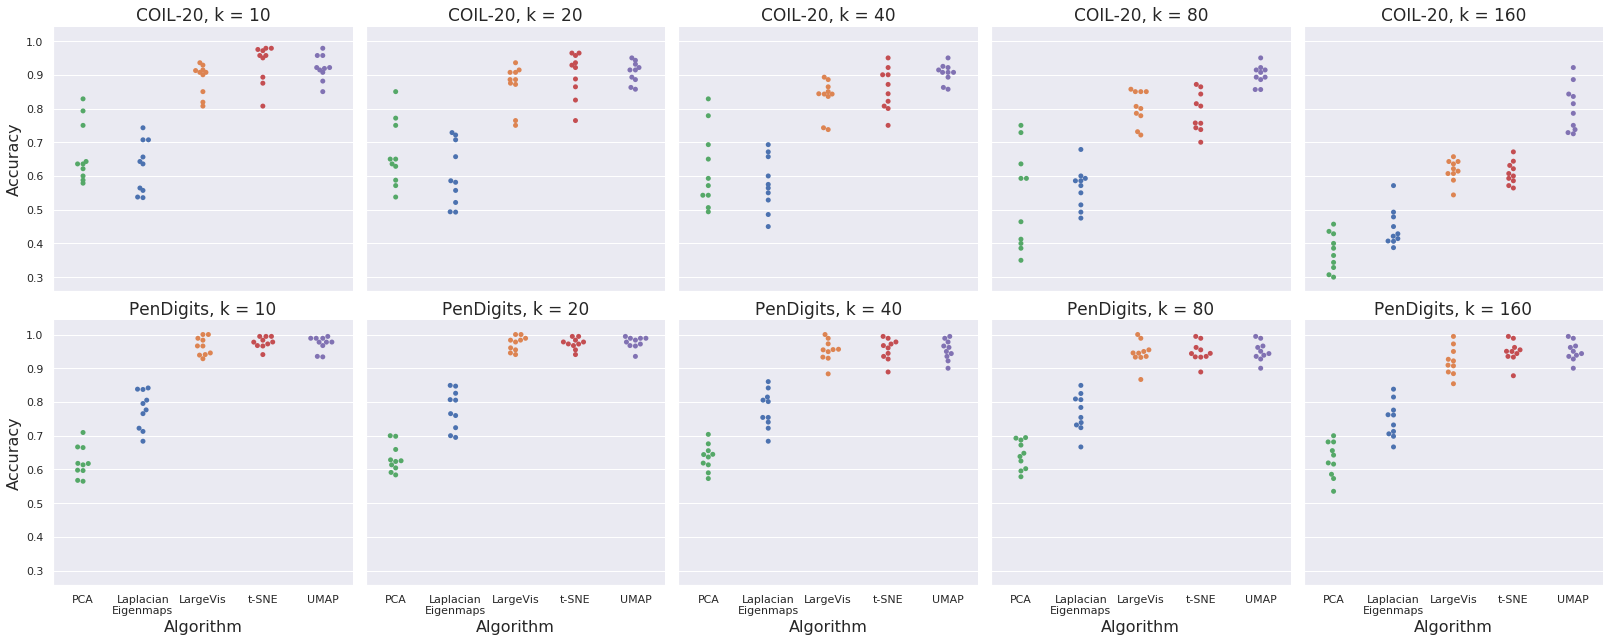

In [49]:
grid = sns.catplot(x='Algorithm', 
                   y='Accuracy', 
                   hue='Algorithm', 
                   kind='swarm', 
                   col='k',
                   row='Dataset',
                   order=['PCA', 'Laplacian\nEigenmaps', 'LargeVis', 't-SNE', 'UMAP'],
                   height=4.5,
                   data=small_data)
grid.set_xlabels(fontsize=16)
grid.set_ylabels(fontsize=16)
grid.set_titles(template='{row_name}, k = {col_name}', size=17)
grid.savefig('small_data_crossval.png')

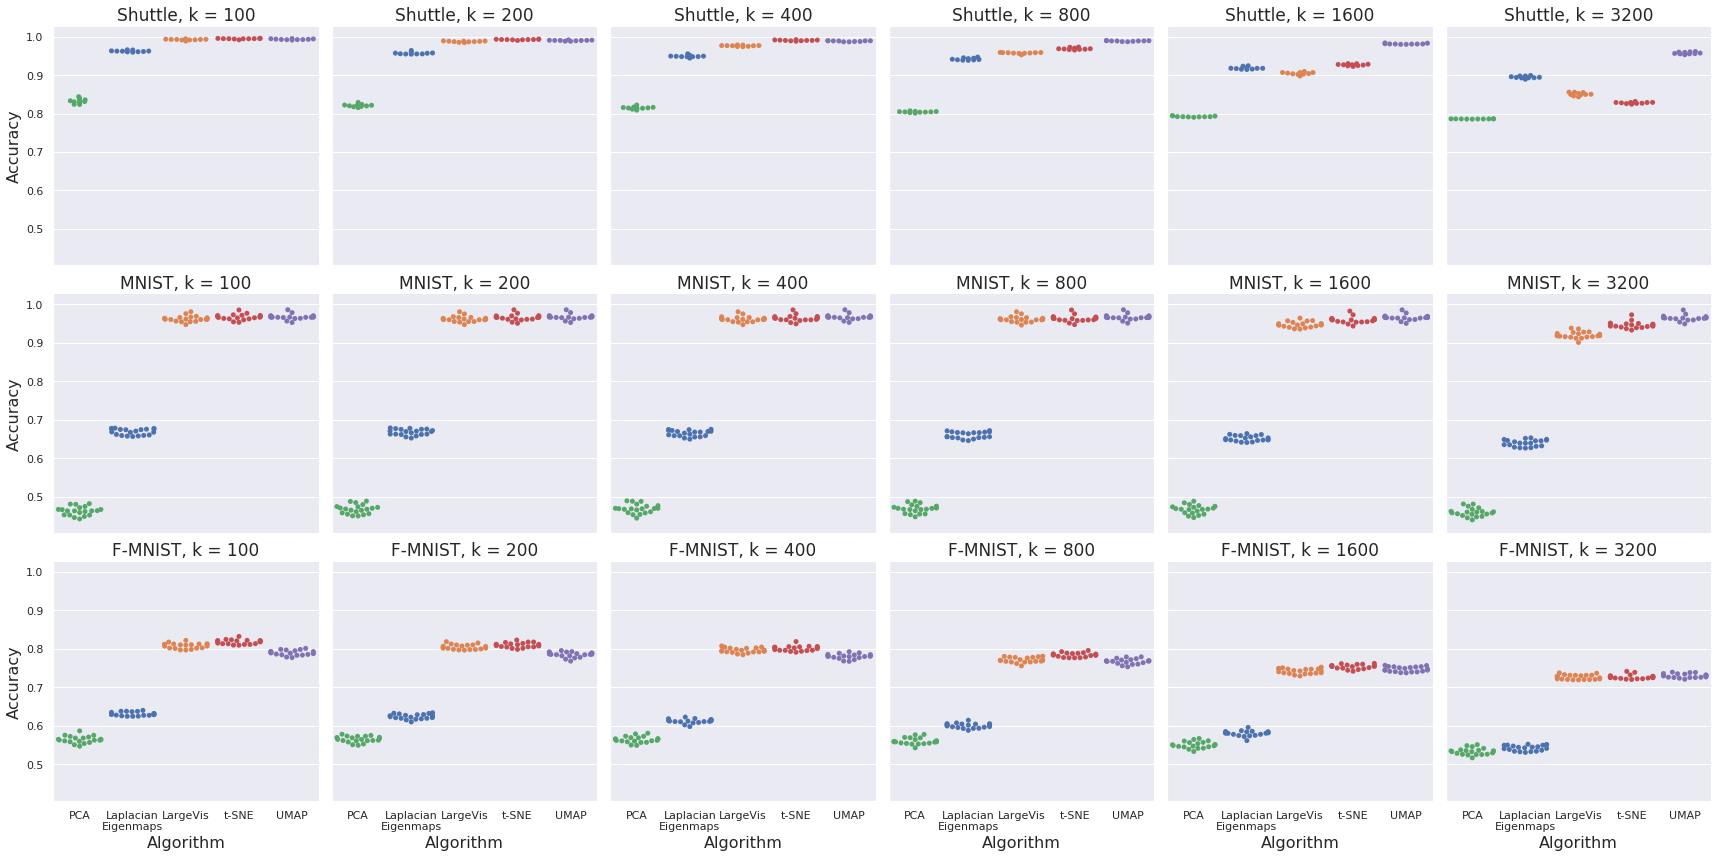

In [48]:
grid = sns.catplot(x='Algorithm', 
                    y='Accuracy', 
                    hue='Algorithm', 
                    kind='swarm', 
                    col='k',
                    row='Dataset',
                    order=['PCA', 'Laplacian\nEigenmaps', 'LargeVis', 't-SNE', 'UMAP'],
                    height=4,
                    data=large_data)
grid.set_xlabels(fontsize=16)
grid.set_ylabels(fontsize=16)
grid.set_titles(template='{row_name}, k = {col_name}', size=17)
grid.savefig('large_data_crossval.png')

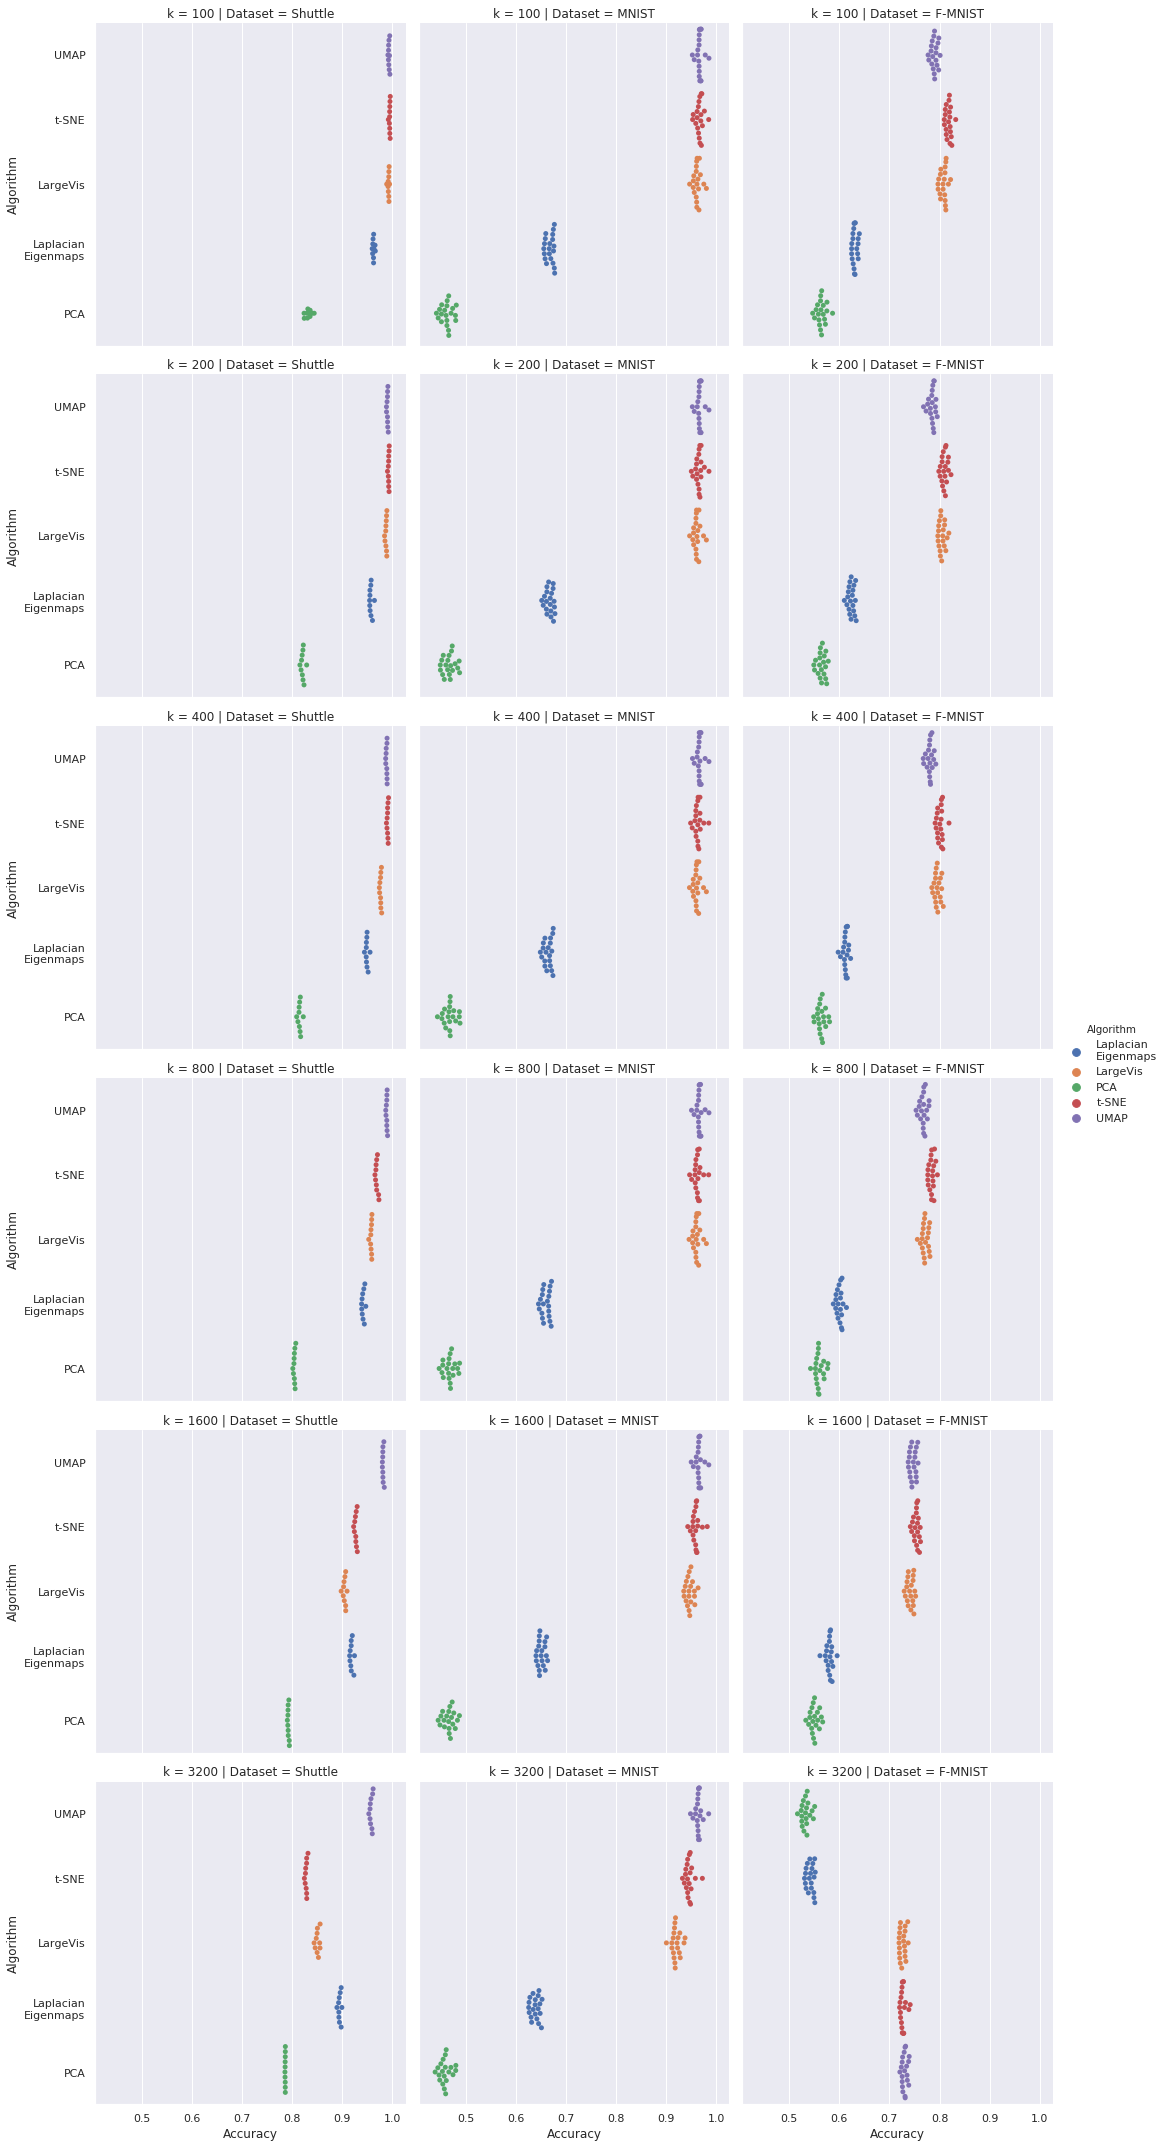

In [26]:
sns.catplot(x='Accuracy', 
            y='Algorithm', 
            hue='Algorithm', 
            kind='swarm', 
            col='Dataset',
            row='k',
            order=['PCA', 'Laplacian\nEigenmaps', 'LargeVis', 't-SNE', 'UMAP'],
            orient='horizontal',
            data=large_data)